In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot as plt

In [2]:
train_dfs = []
for idx in range(1, 11):
    train_dfs.append(pd.read_csv("sample{}.csv".format(idx), header=None))

In [3]:
for idx, train_df in enumerate(train_dfs):
    print("Shape of train_df{}: {}".format(idx+1, train_df.shape))

Shape of train_df1: (25, 2)
Shape of train_df2: (25, 2)
Shape of train_df3: (25, 2)
Shape of train_df4: (25, 2)
Shape of train_df5: (25, 2)
Shape of train_df6: (25, 2)
Shape of train_df7: (25, 2)
Shape of train_df8: (25, 2)
Shape of train_df9: (25, 2)
Shape of train_df10: (25, 2)


In [4]:
test_df = pd.read_csv("test.csv", header=None)

In [5]:
print("Shape of test_df: {}".format(test_df.shape))

Shape of test_df: (100, 2)


In [6]:
train_xs = []
train_ys = []
for df in train_dfs:
    train_xs.append(df.iloc[:, 0].values)
    train_ys.append(df.iloc[:, 1].values)

In [7]:
for idx, (train_x, train_y) in enumerate(zip(train_xs, train_ys)):
    print("Shape of train_x{}: {} && Shape of train_y{}: {}".format(idx+1, train_x.shape, idx+1, train_y.shape))

Shape of train_x1: (25,) && Shape of train_y1: (25,)
Shape of train_x2: (25,) && Shape of train_y2: (25,)
Shape of train_x3: (25,) && Shape of train_y3: (25,)
Shape of train_x4: (25,) && Shape of train_y4: (25,)
Shape of train_x5: (25,) && Shape of train_y5: (25,)
Shape of train_x6: (25,) && Shape of train_y6: (25,)
Shape of train_x7: (25,) && Shape of train_y7: (25,)
Shape of train_x8: (25,) && Shape of train_y8: (25,)
Shape of train_x9: (25,) && Shape of train_y9: (25,)
Shape of train_x10: (25,) && Shape of train_y10: (25,)


In [8]:
test_x = test_df.iloc[:, 0].values
test_y = test_df.iloc[:, 1].values

In [9]:
print("Shape of test_x: {}".format(test_x.shape))
print("Shape of test_y: {}".format(test_y.shape))

Shape of test_x: (100,)
Shape of test_y: (100,)


In [10]:
model_dict = {
    1: [],
    2: [],
    3: [],
    4: [],
    5: [],
    6: []
}
for idx in range(1, 7):
    for train_x, train_y in zip(train_xs, train_ys):
        model_dict[idx].append(np.polyfit(train_x, train_y, idx))

In [11]:
for idx, key in enumerate(model_dict):
    print("Length of the model list{}:".format(idx+1), len(model_dict[key]))


Length of the model list1: 10
Length of the model list2: 10
Length of the model list3: 10
Length of the model list4: 10
Length of the model list5: 10
Length of the model list6: 10


In [12]:
def predict(x, model):
    arr = []
    for data in x:
        dim = len(model) - 1
        pred = 0
        for i in model:
            if model[-1] == i:
                pred += i
                break
            pred += (data ** dim) * i
            dim -= 1
        arr.append(pred)
    return arr

In [13]:
mse_dict = {
    1: [],
    2: [],
    3: [],
    4: [],
    5: [],
    6: []
}
for idx in range(1, 7):
    for model in model_dict[idx]:
        mse_dict[idx].append(mean_squared_error(test_y, predict(test_x, model)))

In [14]:
for idx, key in enumerate(mse_dict):
    print("Length of the mse list{}:".format(idx+1), len(mse_dict[key]))

Length of the mse list1: 10
Length of the mse list2: 10
Length of the mse list3: 10
Length of the mse list4: 10
Length of the mse list5: 10
Length of the mse list6: 10


In [15]:
for idx in range(1, 7):
    print("mse_dict{}".format(idx), mse_dict[idx])

mse_dict1 [2.567272528135012, 2.6095481409662464, 3.444971650701764, 2.786426817331451, 2.583674322409223, 3.445554764623103, 2.6158264871464136, 3.0777750790671536, 2.7511853969409197, 2.588870387820492]
mse_dict2 [1.9268225266724486, 2.013260422264308, 2.3447657982100414, 2.113691075554605, 2.2107624869713383, 2.1331996586714745, 2.0070640441998733, 2.208997102223812, 2.0692536648931, 2.0895040591667096]
mse_dict3 [1.5497249787356444, 1.914317046598652, 1.9885742712429306, 1.5816195995297704, 1.6714191535243175, 1.9520274442440078, 1.63047027109046, 1.6393188530181089, 1.963922707714174, 1.6338800044539974]
mse_dict4 [1.6018397980686216, 1.9407904534903055, 2.1377027970042897, 1.5831023434000844, 1.6399737224503097, 1.9575776282353987, 1.8094072474835605, 1.6869870519995696, 1.88934834056969, 1.5818635254672428]
mse_dict5 [1.7282666326675555, 1.9852435955958276, 2.337159260799627, 1.591852886057904, 1.6617003939839352, 2.00260988657892, 1.9507208342183324, 1.7963050169128711, 3.45359

In [16]:
def average_mse(mse_dict):
    averages = []
    for idx in range(1, 7):
        averages.append(sum(mse_dict[idx]) / len(mse_dict[idx]))
    return averages

In [17]:
print(average_mse(mse_dict))

[2.8471105575141777, 2.1117320838827713, 1.752527433015206, 1.7828592908169072, 2.0255761286931007, 3.532900999581308]


In [18]:
def print_model(model):
    buffer = ""
    dim = len(model)-1
    for v in model:
        if v == model[-1]:
            if v < 0:
                buffer += ("(" + str(round(v,2)) + ")")
            else:
                buffer += str(round(v,2))
            break
        if v < 0:
            buffer += "({})*x^{}+".format(round(v, 2), dim)
        else:
            buffer += "{}*x^{}+".format(round(v, 2), dim)
        dim -= 1
    return buffer
        

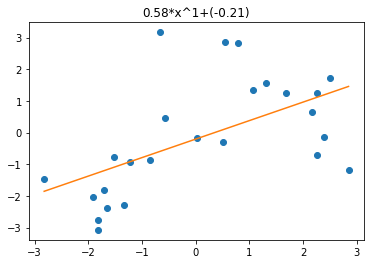

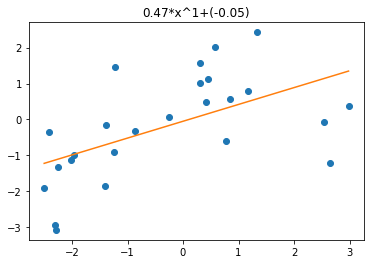

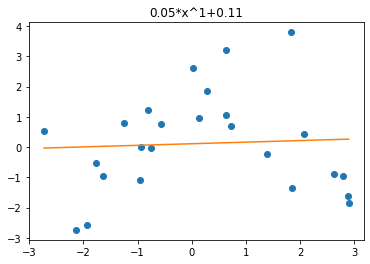

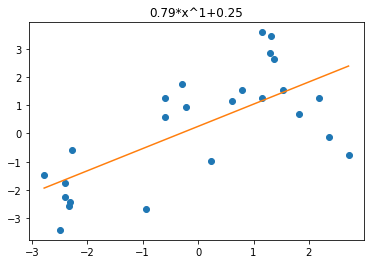

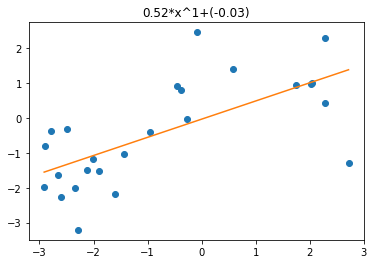

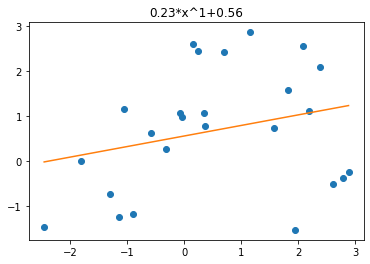

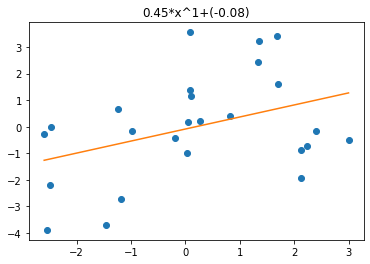

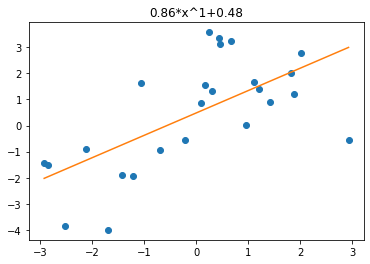

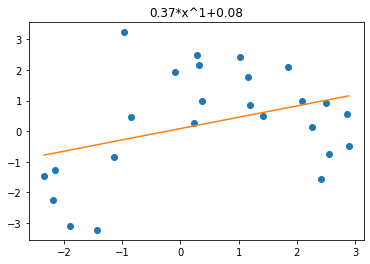

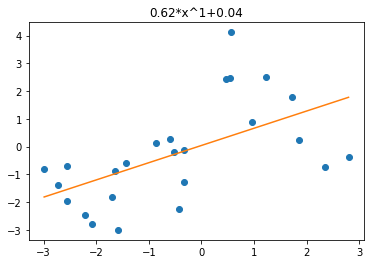

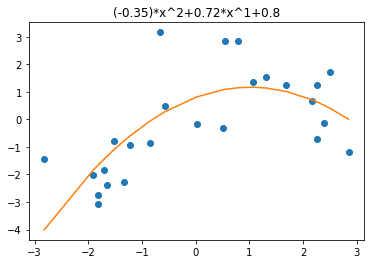

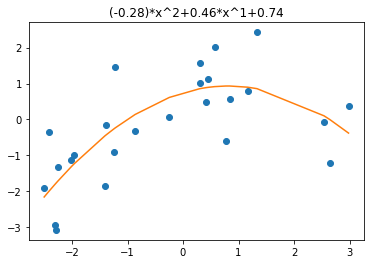

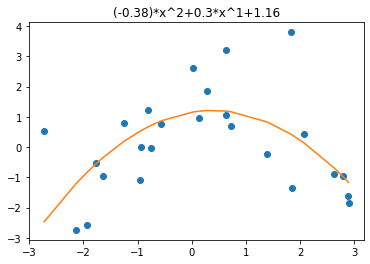

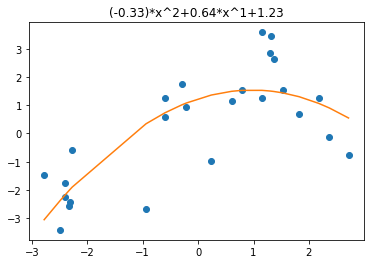

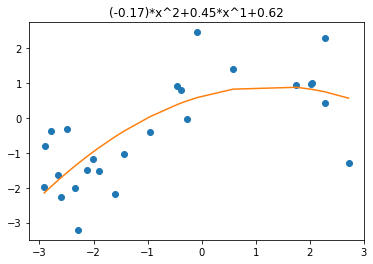

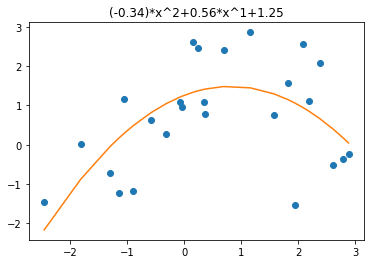

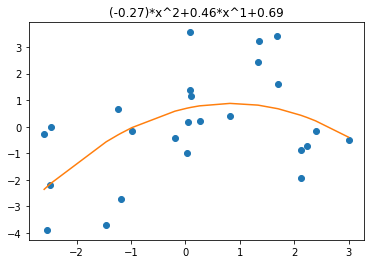

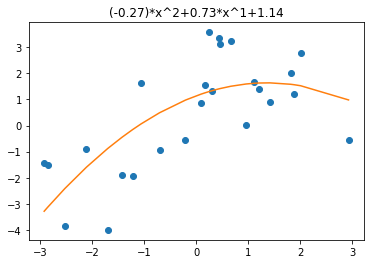

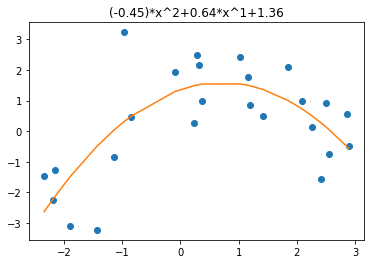

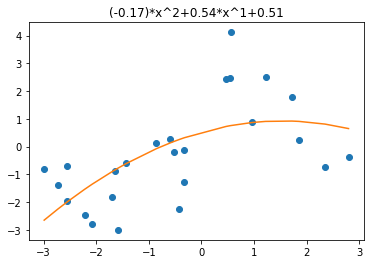

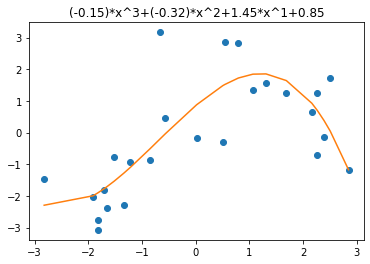

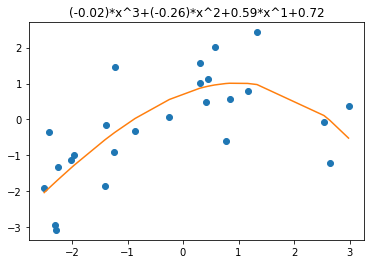

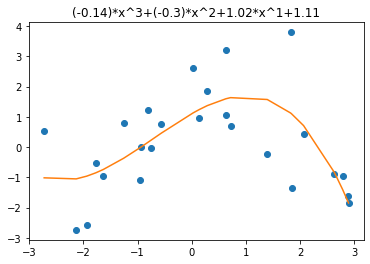

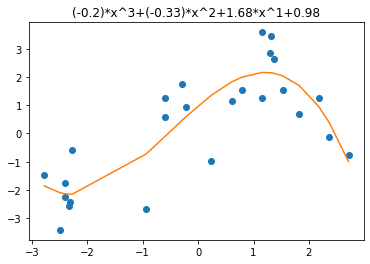

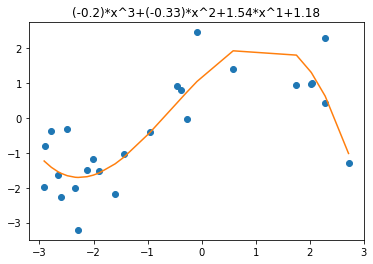

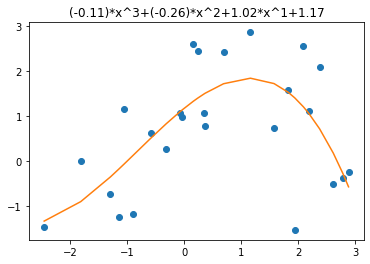

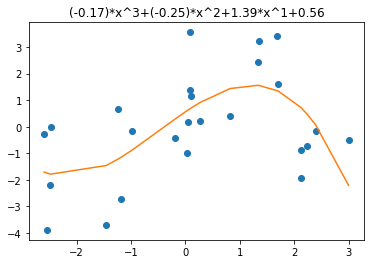

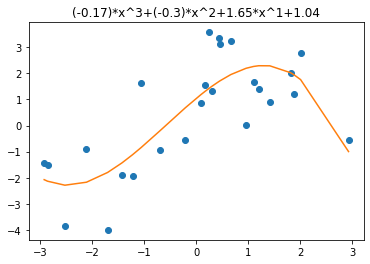

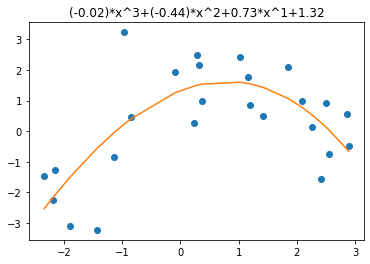

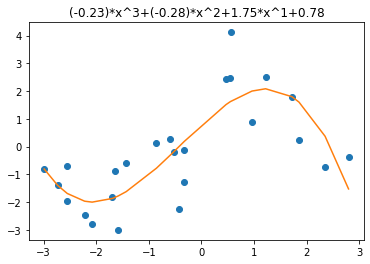

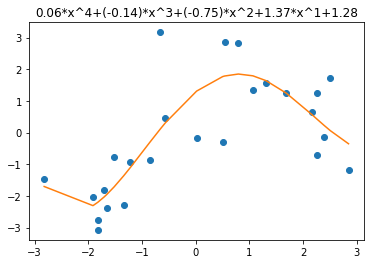

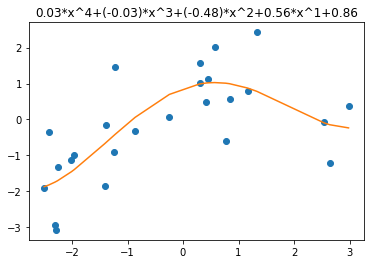

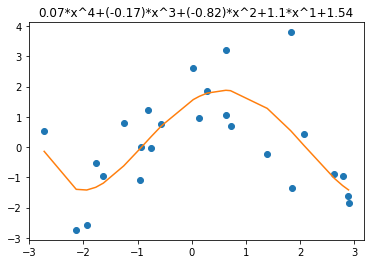

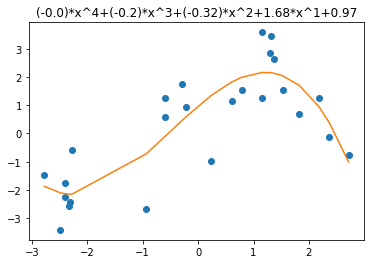

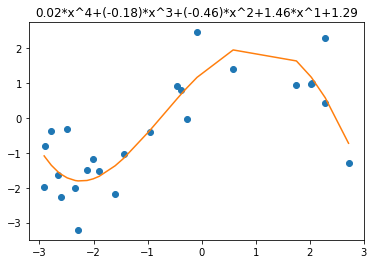

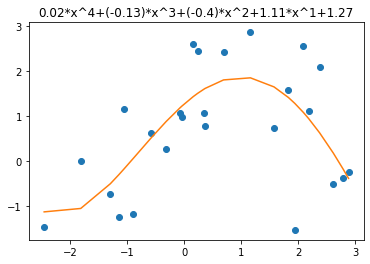

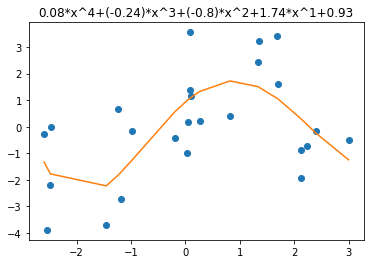

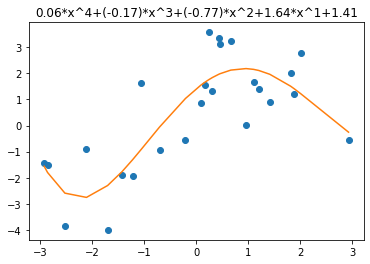

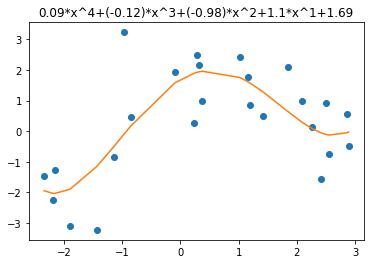

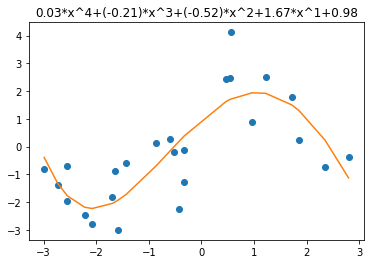

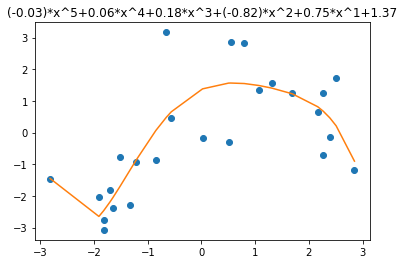

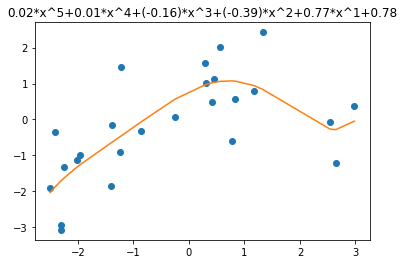

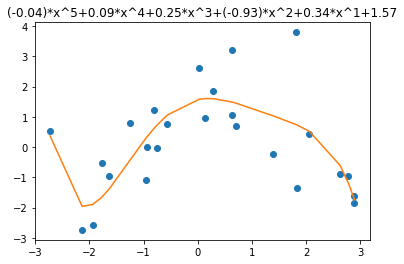

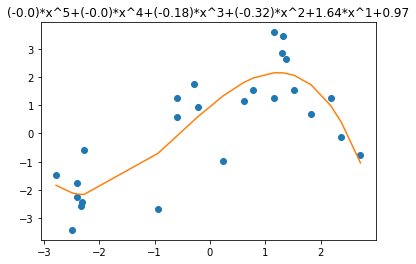

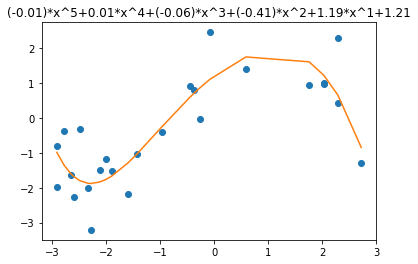

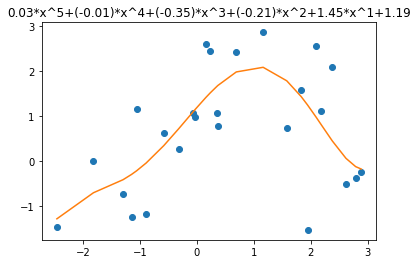

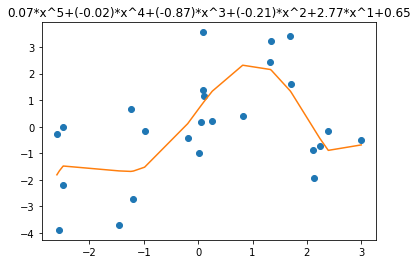

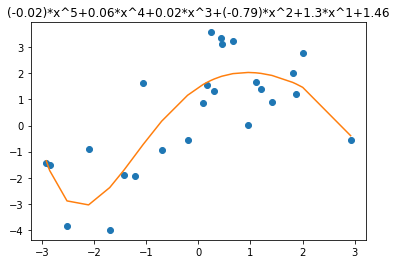

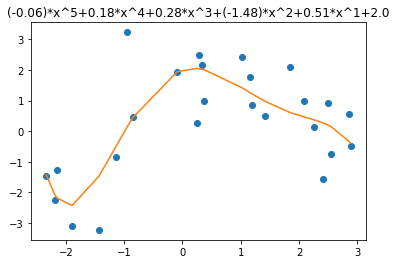

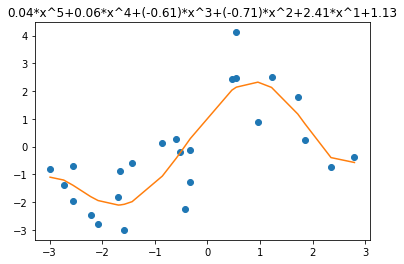

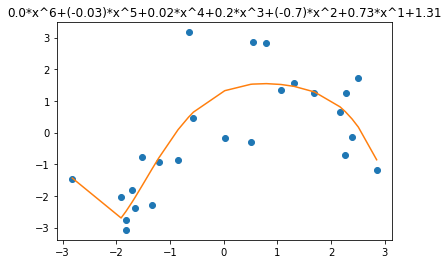

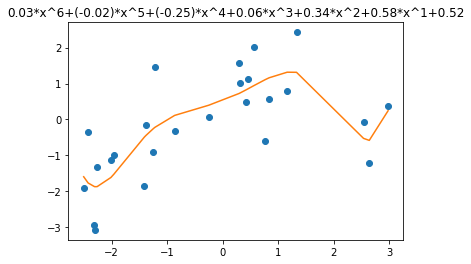

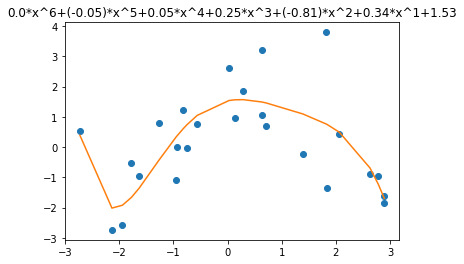

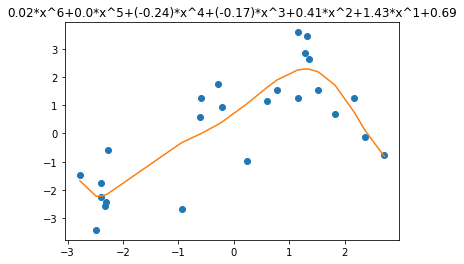

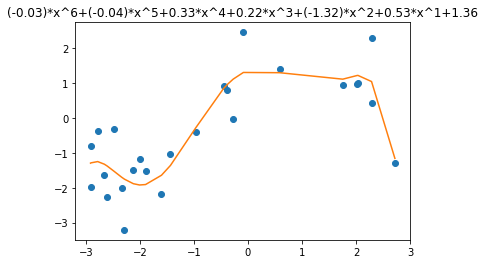

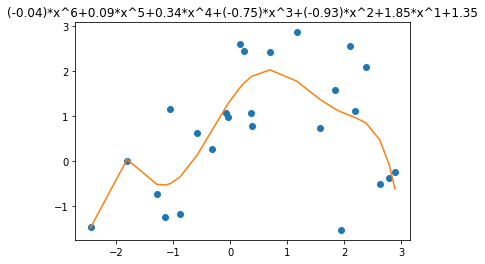

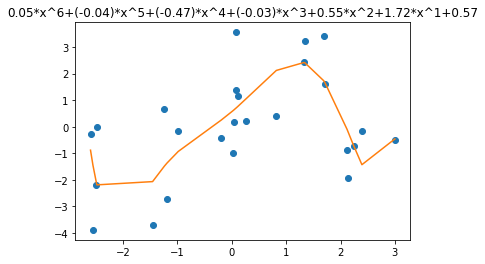

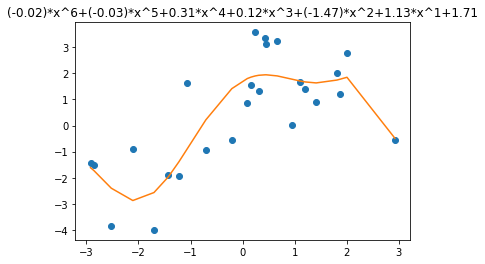

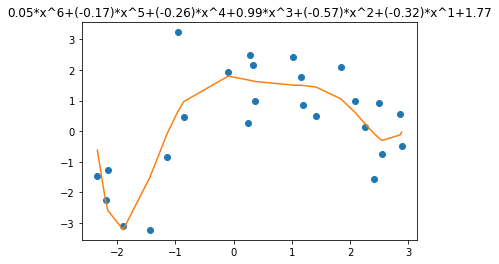

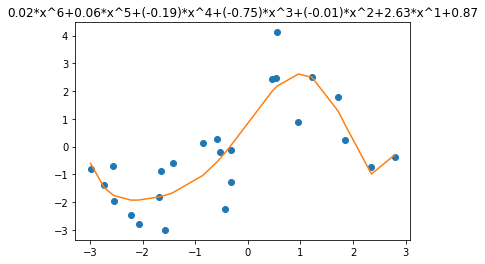

In [19]:
for idx, key in enumerate(model_dict):
    #print(idx+1, ". dimension plotting started!")
    for model, train_x, train_y in zip(model_dict[key], train_xs, train_ys):
        plt.figure()
        plt.plot(train_x, train_y, 'o')
        plt.plot(train_x, np.poly1d(model)(train_x))
        plt.title(print_model(model))
    plt.show()
    #print(idx+1, ". dimension plotting done!")

Text(0.5, 1.0, 'Average Mean Square Error vs Degree')

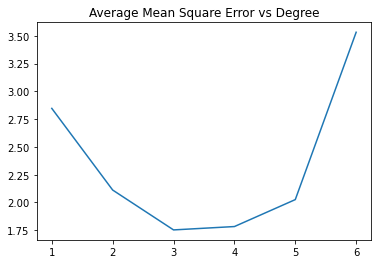

In [20]:
plt.plot([1, 2, 3, 4, 5, 6], average_mse(mse_dict))
plt.title("Average Mean Square Error vs Degree")